In [1]:
%matplotlib inline


# Interpolate Data


In this example we show how to interpolate data from a sparse collection of points
to all the points in the cortical surface.

The method used here is biharmonic interpolation, which finds the solution with
the minimum squared Laplacian (fourth derivative) that still passes through all
the selected points. This is similar to thin plate splines.


/home/chris/anaconda3/envs/py3.7/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:310: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


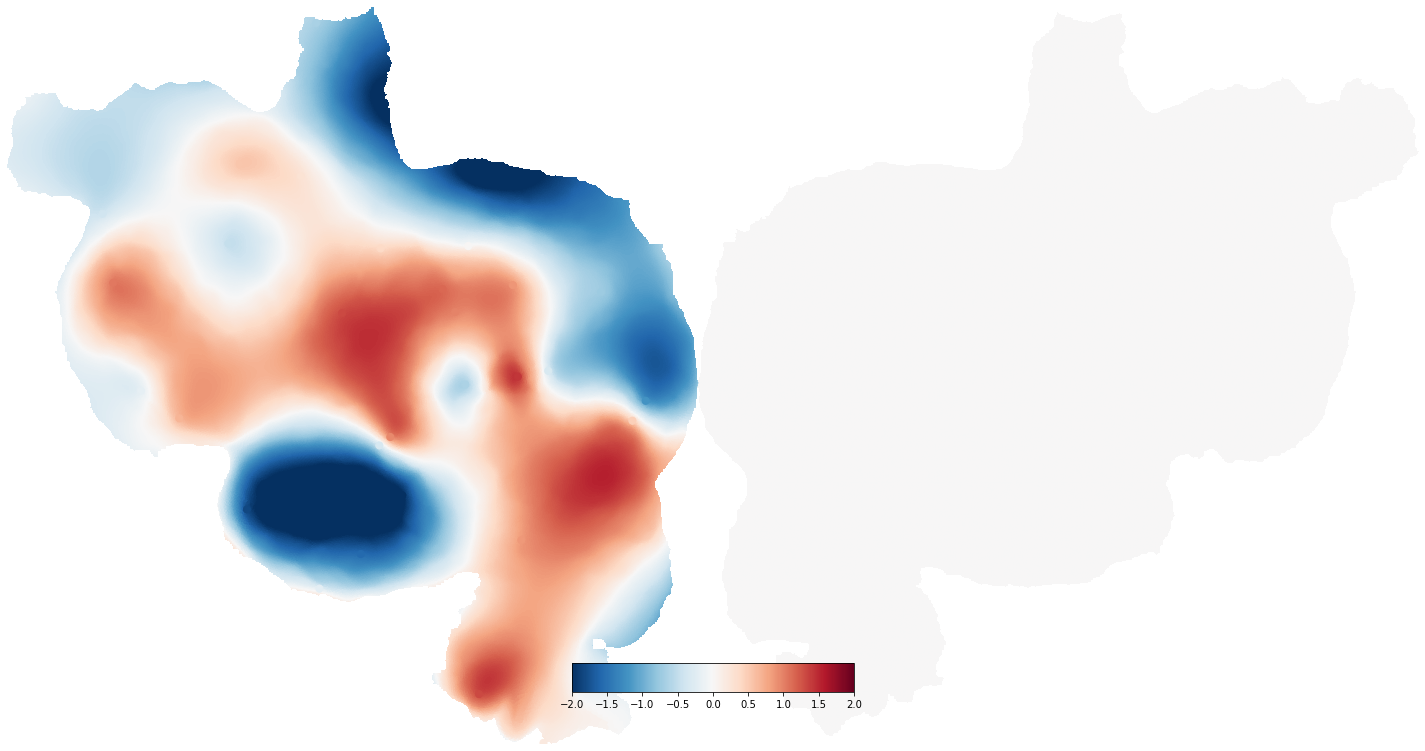

In [2]:
import cortex
from cortex.polyutils import Surface
import numpy as np
np.random.seed(1234)
from matplotlib import pyplot as plt

subject = "S1"

# First we need to import the surfaces for this subject
lsurf, rsurf = [Surface(*d) for d in cortex.db.get_surf(subject, "fiducial")]

# Let's choose a few points and generate data for them
selected_pts = np.arange(len(lsurf.pts), step=5000)
num_selected_pts = len(selected_pts)
sparse_data = np.random.randn(num_selected_pts)

# Then interpolate
interp_data = lsurf.interp(selected_pts, sparse_data)

# Plot the result
# interp_data is only for the left hemisphere, but the Vertex constructor
# infers that and fills the right hemisphere with zeros
interp_vertex = cortex.Vertex(interp_data[:,0], subject, 
                              vmin=-2, vmax=2, cmap='RdBu_r')
cortex.quickshow(interp_vertex, with_labels=False, with_rois=False)


# plot the locations of the points we selected originally

# nudge=True puts both left and right hemispheres in the same space, moving them
# so that they don't overlap. These are the coordinates used in quickflat
(lflatpts, lpolys), (rflatpts, rpolys) = cortex.db.get_surf(subject, "flat", 
                                                            nudge=True)

ax = plt.gca()
# zorder is set to 10 to make sure points go on top of other quickflat layers
ax.scatter(lflatpts[selected_pts,0], lflatpts[selected_pts,1], s=50, 
           c=sparse_data, vmin=-2, vmax=2, cmap=plt.cm.RdBu_r, zorder=10)


# the interpolate function can also handle multiple dimensions at the same time
# (this takes a while to run for no plotting, and thus is commented out)
#sparse_data_2d = np.random.randn(10, num_selected_pts)
#interp_data_2d = lsurf.interp(selected_pts, sparse_data_2d)

# > interp_data_2d.shape
# (152893, 10)
plt.show()

In [3]:
#cortex.quickshow(interp_vertex, with_labels=False, with_rois=False)
cortex.webgl.show(interp_vertex)

Started server on port 22938


<JS: window.viewer>

Stopping server
